In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from functions import split

splitter_object = split.Splitter("./data", "|")

splitter_object.file_splitter("valeursfoncieres-2019.txt", "Nombre pieces principales", "vfoncieres_splitted")

Split fichier valeursfoncieres-2019.txt terminé


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [15]:
csv = pd.read_csv("./data/RAW/valeursfoncieres-2019.txt", sep = '|', decimal = ',', usecols = ['Nature mutation', 'Valeur fonciere', 'Code postal', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Type local', 'Nombre pieces principales', "Surface terrain", "Surface reelle bati"])

In [16]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "Nombre pieces principales", "Surface terrain", "Type local", "Surface reelle bati"]][csv["Nature mutation"].str.contains("Vente", regex=True)]

In [17]:
csv = csv.dropna(subset=["Type local"])

In [18]:
csv = csv[["Valeur fonciere", "Code postal","Nombre de lots", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot", "Nombre pieces principales", "Surface terrain", "Surface reelle bati"]][csv["Type local"].str.contains("Appartement|Maison", regex=True)]

In [19]:
csv["Carrez total"] = csv[["Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"]].sum(axis=1)

In [20]:
csv2 = csv.drop(columns=["Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"])

In [21]:
csv2 = csv2.dropna(subset=['Valeur fonciere'])
csv2 = csv2.dropna(subset=['Code postal'])
csv2 = csv2.dropna(subset=['Carrez total'])
csv2 = csv2.dropna(subset=['Surface reelle bati'])
csv2 = csv2[csv2["Nombre de lots"] < 6]
csv2 = csv2[csv2["Nombre pieces principales"] != 0]
csv2 = csv2[csv2["Surface reelle bati"] > 8]
csv3 = csv2.fillna(0)

In [22]:
csv3.to_csv("./data/CURATED/CSV_CLEAN_1.csv")
csv3

,Valeur fonciere,Code postal,Nombre de lots,Nombre pieces principales,Surface terrain,Surface reelle bati,Carrez total
0,37220.0,1000.0,1,1.0,0.0,20.0,19.27
1,185100.0,1000.0,2,3.0,0.0,62.0,61.51
3,209000.0,1160.0,0,4.0,940.0,90.0,0.00
4,134900.0,1370.0,0,5.0,490.0,101.0,0.00
5,192000.0,1340.0,0,4.0,708.0,88.0,0.00
...,...,...,...,...,...,...,...
2535783,17521000.0,75004.0,0,1.0,470.0,47.0,0.00
2535784,17521000.0,75004.0,0,2.0,470.0,55.0,0.00
2535785,17521000.0,75004.0,0,4.0,470.0,66.0,0.00
2535786,17521000.0,75004.0,0,5.0,470.0,120.0,0.00


In [2]:
cleaned_dataframe = pd.read_csv('./data/CURATED/CSV_CLEAN_1.csv')
sample_cleaned_dataframe = cleaned_dataframe.sample(n=200000, random_state=2)
sample_cleaned_dataframe.drop(columns=['Unnamed: 0'], inplace=True)

&lt;AxesSubplot:&gt;

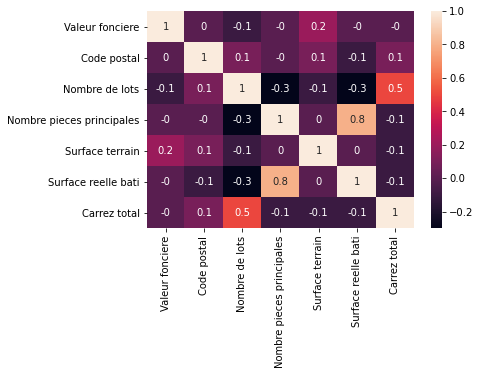

In [3]:
matrice_corr = sample_cleaned_dataframe.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [4]:
X=pd.DataFrame(np.c_[sample_cleaned_dataframe['Code postal'],sample_cleaned_dataframe['Nombre pieces principales'],sample_cleaned_dataframe['Surface terrain'],sample_cleaned_dataframe['Surface reelle bati']], columns = ['Code postal','Nombre pieces principales','Surface terrain','Surface reelle bati'])
Y = sample_cleaned_dataframe['Valeur fonciere']
 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=6)

In [5]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
 
lmodellineaire = LinearRegression().fit(X_train, Y_train)

In [6]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_train_predict = lmodellineaire.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
 
print("La performance du modèle sur la base dapprentissage")
print("--------------------------------------")
print("L'erreur quadratique moyenne est {}".format(rmse))
print("le score R2 est {}".format(r2))
print("\n")
 
y_test_predict = lmodellineaire.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
 
print("La performance du modèle sur la base de test")
print("--------------------------------------")
print("L'erreur quadratique moyenne est {}".format(rmse))
print("le score R2 est {}".format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
L&#39;erreur quadratique moyenne est 9855529.981925087
le score R2 est 0.04852671126202146


La performance du modèle sur la base de test
--------------------------------------
L&#39;erreur quadratique moyenne est 9317081.061797423
le score R2 est 0.05875035289758779
